In [90]:
# binary
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("tableau-colorblind10")
mpl.rcParams["image.cmap"] = "coolwarm"

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

In [91]:
def normalize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1/(1 + np.exp(-z))

def score(y_pred, y):
    return (y_pred == y).mean() 

def predict(X, w):
    y_pred_proba = X @ w
    return [0 if p < 0.5 else 1 for p in y_pred_proba]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["target"]).values, df["target"].values,
    test_size=0.2,
    random_state=42
)
# important for numerical stability
X_train = normalize(X_train)
# to incorporate bias term in w
X_train = np.hstack(
    [
        X_train,
        np.ones((X_train.shape[0], 1))
    ]
)
X_test = normalize(X_test)
X_test = np.hstack(
    [
        X_test,
        np.ones(
            (X_test.shape[0], 1)
        )
    ]
)
m, n = X_train.shape
y_train = y_train.reshape(-1,1)

\begin{align*}
    \mathbf{z} &= \mathbf{X}\mathbf{w}\\
    \sigma(\mathbf{z}) &= \frac{1}{1 + e^{-\mathbf{z}}}\\
    J(\mathbf{X}, \mathbf{w}) &= -\frac{1}{m} \left[ \mathbf{y}^T \log(\sigma(\mathbf{z})) + \left(\mathbf{1}-\mathbf{y}\right)^T\log(1-\sigma(\mathbf{z})) \right] \\
    \frac{\partial J(\mathbf{X}, \mathbf{w})}{\partial \mathbf{w}} &= \frac{1}{m} \mathbf{X}^T (\sigma(\mathbf{z}) - \mathbf{y})\\
    \mathbf{w} &= \mathbf{w} - \alpha\frac{\partial J(\mathbf{X}, \mathbf{w})}{\partial \mathbf{w}} \\
\end{align*}

In [97]:
def logistic_regression(X, y, num_iter=10_000, alpha=0.01, lambda_=0.75, penalty=None):
    m = X.shape[0]
    J_history = []
    w = np.zeros((n, 1))
    for _ in range(num_iter):
        z = X @ w
        s = sigmoid(z)
        match penalty:
            case None:
                w -= alpha * (1/m) * (X.T @ (s - y))
                J = (-1/m) * (y.T @ np.log(s) + (1 - y).T @ np.log(1-s))
            case "l2":
                w = (1 - alpha * lambda_ / m)*w - alpha * (1/m) * (X.T @ (s - y))
                J = (-1/m) * (y.T @ np.log(s) + (1 - y).T @ np.log(1-s)) + (1/m) * lambda_ * np.linalg.norm(w, 2)**2
            case "l1":
                w -= (alpha * lambda_/m * np.sign(w) + alpha * (1/m) * (X.T @ (s - y)))
                J = (-1/m) * (y.T @ np.log(s) + (1 - y).T @ np.log(1-s)) + (1/m) * lambda_ * np.linalg.norm(w, 1)
            case _:
                raise ValueError(f"penalty `{penalty}` is invalid")
        J_history.append(J.item())
    return w, J_history

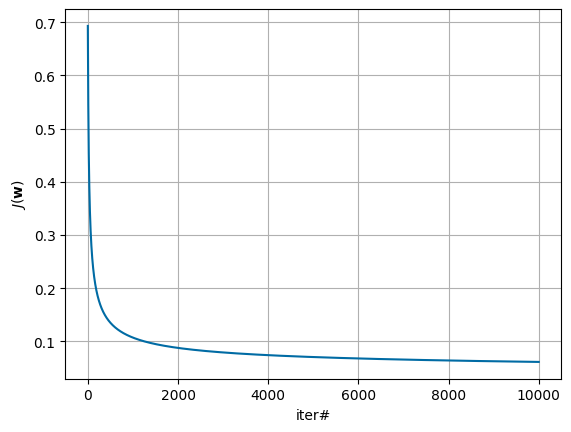

np.float64(0.9912280701754386)

In [98]:
w, J_history = logistic_regression(X_train, y_train)

plt.plot(J_history)
plt.xlabel("iter#")
plt.ylabel(r"$J(\mathbf{w})$")
plt.grid()
plt.show()

y_pred = predict(X_test, w)
score(y_pred, y_test)

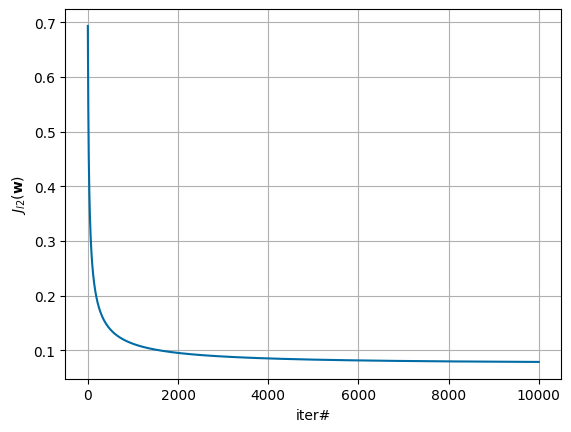

np.float64(0.9912280701754386)

In [99]:
w_l2, J_history_l2 = logistic_regression(X_train, y_train, penalty="l2")

plt.plot(J_history_l2)
plt.xlabel("iter#")
plt.ylabel(r"$J_{l2}(\mathbf{w})$")
plt.grid()
plt.show()

y_pred = predict(X_test, w_l2)
score(y_pred, y_test)

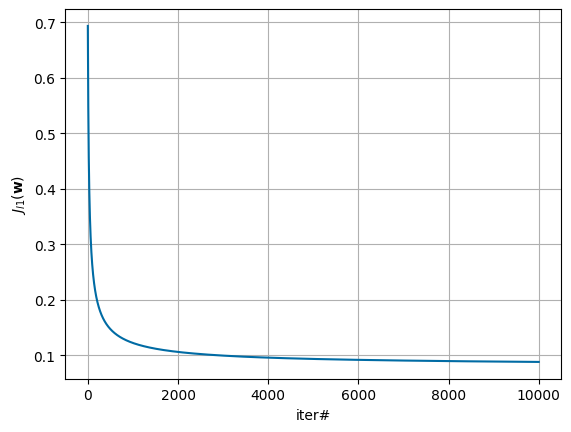

np.float64(0.9912280701754386)

In [100]:
w_l1, J_history_l1 = logistic_regression(X_train, y_train, penalty="l1")

plt.plot(J_history_l1)
plt.xlabel("iter#")
plt.ylabel(r"$J_{l1}(\mathbf{w})$")
plt.grid()
plt.show()

y_pred = predict(X_test, w_l1)
score(y_pred, y_test)